## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd

import os
import sys

from matplotlib import pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.font_manager.rcParams['font.family'] = 'DejaVu Sans'

%matplotlib inline

## Загрузка данных

In [2]:
PATH = os.path.expanduser("~/data/hackathon/sql/train-test3")

Сначала загрузим небольшой кусок даннных, чтобы посмотреть на структуру.

In [3]:
bs_avg_kpi = pd.read_csv(os.path.join(PATH, 'bs_avg_kpi.csv'), sep=';', decimal=',', nrows=10)

In [4]:
bs_avg_kpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 44 columns):
T_DATE                            10 non-null object
CELL_LAC_ID                       10 non-null int64
CELL_AVAILABILITY_2G              10 non-null int64
CELL_AVAILABILITY_3G              10 non-null int64
CELL_AVAILABILITY_4G              10 non-null float64
CSSR_2G                           10 non-null float64
CSSR_3G                           0 non-null float64
ERAB_PS_BLOCKING_RATE_LTE         0 non-null float64
ERAB_PS_BLOCKING_RATE_PLMN_LTE    0 non-null float64
ERAB_PS_DROP_RATE_LTE             0 non-null float64
HSPDSCH_CODE_UTIL_3G              0 non-null float64
NODEB_CNBAP_LOAD_HARDWARE         0 non-null float64
PART_CQI_QPSK_LTE                 0 non-null float64
PART_MCS_QPSK_LTE                 0 non-null float64
PROC_LOAD_3G                      0 non-null float64
PSSR_2G                           0 non-null float64
PSSR_3G                           0 non-null float6

In [5]:
bs_avg_kpi.head()

,T_DATE,CELL_LAC_ID,CELL_AVAILABILITY_2G,CELL_AVAILABILITY_3G,CELL_AVAILABILITY_4G,CSSR_2G,CSSR_3G,ERAB_PS_BLOCKING_RATE_LTE,ERAB_PS_BLOCKING_RATE_PLMN_LTE,ERAB_PS_DROP_RATE_LTE,...,TCH_DROP_RATE_2G,UTIL_BRD_CPU_3G,UTIL_CE_DL_3G,UTIL_CE_HW_DL_3G,UTIL_CE_UL_3G,UTIL_SUBUNITS_3G,UL_VOLUME_LTE,DL_VOLUME_LTE,TOTAL_DL_VOLUME_3G,TOTAL_UL_VOLUME_3G
0,01.01,275453,1,1,0.02774,0.932420,NaN,NaN,NaN,NaN,...,0.000377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01.01,75331,1,1,0.02774,0.920801,NaN,NaN,NaN,NaN,...,0.000620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01.01,372021,1,1,0.02774,0.929026,NaN,NaN,NaN,NaN,...,0.000354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01.01,383252,1,1,0.02774,0.923729,NaN,NaN,NaN,NaN,...,0.000587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01.01,80247,1,1,0.02774,0.924741,NaN,NaN,NaN,NaN,...,0.000325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bs_avg_kpi.columns

Index(['T_DATE', 'CELL_LAC_ID', 'CELL_AVAILABILITY_2G', 'CELL_AVAILABILITY_3G',
       'CELL_AVAILABILITY_4G', 'CSSR_2G', 'CSSR_3G',
       'ERAB_PS_BLOCKING_RATE_LTE', 'ERAB_PS_BLOCKING_RATE_PLMN_LTE',
       'ERAB_PS_DROP_RATE_LTE', 'HSPDSCH_CODE_UTIL_3G',
       'NODEB_CNBAP_LOAD_HARDWARE', 'PART_CQI_QPSK_LTE', 'PART_MCS_QPSK_LTE',
       'PROC_LOAD_3G', 'PSSR_2G', 'PSSR_3G', 'PSSR_LTE',
       'RAB_CS_BLOCKING_RATE_3G', 'RAB_CS_DROP_RATE_3G',
       'RAB_PS_BLOCKING_RATE_3G', 'RAB_PS_DROP_RATE_3G', 'RBU_AVAIL_DL',
       'RBU_AVAIL_DL_LTE', 'RBU_AVAIL_UL', 'RBU_OTHER_DL', 'RBU_OTHER_UL',
       'RBU_OWN_DL', 'RBU_OWN_UL', 'RRC_BLOCKING_RATE_3G',
       'RRC_BLOCKING_RATE_LTE', 'RTWP_3G', 'SHO_FACTOR', 'TBF_DROP_RATE_2G',
       'TCH_DROP_RATE_2G', 'UTIL_BRD_CPU_3G', 'UTIL_CE_DL_3G',
       'UTIL_CE_HW_DL_3G', 'UTIL_CE_UL_3G', 'UTIL_SUBUNITS_3G',
       'UL_VOLUME_LTE', 'DL_VOLUME_LTE', 'TOTAL_DL_VOLUME_3G',
       'TOTAL_UL_VOLUME_3G'],
      dtype='object')

Выделим числовые колонки.

In [7]:
float_columns = ['CELL_AVAILABILITY_2G', 'CELL_AVAILABILITY_3G',
       'CELL_AVAILABILITY_4G', 'CSSR_2G', 'CSSR_3G',
       'ERAB_PS_BLOCKING_RATE_LTE', 'ERAB_PS_BLOCKING_RATE_PLMN_LTE',
       'ERAB_PS_DROP_RATE_LTE', 'HSPDSCH_CODE_UTIL_3G',
       'NODEB_CNBAP_LOAD_HARDWARE', 'PART_CQI_QPSK_LTE', 'PART_MCS_QPSK_LTE',
       'PROC_LOAD_3G', 'PSSR_2G', 'PSSR_3G', 'PSSR_LTE',
       'RAB_CS_BLOCKING_RATE_3G', 'RAB_CS_DROP_RATE_3G',
       'RAB_PS_BLOCKING_RATE_3G', 'RAB_PS_DROP_RATE_3G', 'RBU_AVAIL_DL',
       'RBU_AVAIL_DL_LTE', 'RBU_AVAIL_UL', 'RBU_OTHER_DL', 'RBU_OTHER_UL',
       'RBU_OWN_DL', 'RBU_OWN_UL', 'RRC_BLOCKING_RATE_3G',
       'RRC_BLOCKING_RATE_LTE', 'RTWP_3G', 'SHO_FACTOR', 'TBF_DROP_RATE_2G',
       'TCH_DROP_RATE_2G', 'UTIL_BRD_CPU_3G', 'UTIL_CE_DL_3G',
       'UTIL_CE_HW_DL_3G', 'UTIL_CE_UL_3G', 'UTIL_SUBUNITS_3G',
       'UL_VOLUME_LTE', 'DL_VOLUME_LTE', 'TOTAL_DL_VOLUME_3G',
       'TOTAL_UL_VOLUME_3G']

Для экономии памяти составим словарь типов для параметра `dtype` функции `pd.read_csv`. Числовые данные загрузим с типом `float16`, идентификатор соты - целым, дату - категорией.

In [8]:
dtype_dict = {'T_DATE':'category', 'CELL_LAC_ID': np.int64}

In [9]:
for c in float_columns:
    dtype_dict[c] = np.float16

Теперь загрузим все данные.

In [10]:
bs_avg_kpi = pd.read_csv(os.path.join(PATH, 'bs_avg_kpi.csv'), sep=';', decimal=',', dtype=dtype_dict)

In [11]:
bs_avg_kpi.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58941383 entries, 0 to 58941382
Data columns (total 44 columns):
T_DATE                            category
CELL_LAC_ID                       int64
CELL_AVAILABILITY_2G              float16
CELL_AVAILABILITY_3G              float16
CELL_AVAILABILITY_4G              float16
CSSR_2G                           float16
CSSR_3G                           float16
ERAB_PS_BLOCKING_RATE_LTE         float16
ERAB_PS_BLOCKING_RATE_PLMN_LTE    float16
ERAB_PS_DROP_RATE_LTE             float16
HSPDSCH_CODE_UTIL_3G              float16
NODEB_CNBAP_LOAD_HARDWARE         float16
PART_CQI_QPSK_LTE                 float16
PART_MCS_QPSK_LTE                 float16
PROC_LOAD_3G                      float16
PSSR_2G                           float16
PSSR_3G                           float16
PSSR_LTE                          float16
RAB_CS_BLOCKING_RATE_3G           float16
RAB_CS_DROP_RATE_3G               float16
RAB_PS_BLOCKING_RATE_3G           float16
RAB_

## Определение поколения соты

Известно, что каждая сота принадлежит только одному поколению (2g, 3g, 4g). Дан список показателей для каждого поколения.

In [12]:
bs_2g_columns = ['CELL_AVAILABILITY_2G', 'CSSR_2G', 'PSSR_2G', 'TBF_DROP_RATE_2G', 'TCH_DROP_RATE_2G']
bs_3g_columns = ['CELL_AVAILABILITY_3G', 'CSSR_3G', 'HSPDSCH_CODE_UTIL_3G', 'NODEB_CNBAP_LOAD_HARDWARE', 
                 'PROC_LOAD_3G', 'PSSR_3G', 'RAB_CS_BLOCKING_RATE_3G', 'RAB_CS_DROP_RATE_3G',
                 'RAB_PS_BLOCKING_RATE_3G', 'RAB_PS_DROP_RATE_3G', 'RRC_BLOCKING_RATE_3G',
                 'RTWP_3G', 'SHO_FACTOR', 'UTIL_BRD_CPU_3G', 'UTIL_CE_DL_3G','UTIL_CE_HW_DL_3G', 
                 'UTIL_CE_UL_3G', 'UTIL_SUBUNITS_3G', 'TOTAL_DL_VOLUME_3G', 'TOTAL_UL_VOLUME_3G']
bs_4g_columns = ['CELL_AVAILABILITY_4G','ERAB_PS_BLOCKING_RATE_LTE', 'ERAB_PS_BLOCKING_RATE_PLMN_LTE',
                 'ERAB_PS_DROP_RATE_LTE', 'PART_CQI_QPSK_LTE', 'PART_MCS_QPSK_LTE','PSSR_LTE',
                 'RBU_AVAIL_DL','RBU_AVAIL_DL_LTE', 'RBU_AVAIL_UL', 'RBU_OTHER_DL', 'RBU_OTHER_UL',
                 'RBU_OWN_DL', 'RBU_OWN_UL', 'RRC_BLOCKING_RATE_LTE', 'UL_VOLUME_LTE', 'DL_VOLUME_LTE']

In [14]:
bs_avg_kpi.sample(5)

,T_DATE,CELL_LAC_ID,CELL_AVAILABILITY_2G,CELL_AVAILABILITY_3G,CELL_AVAILABILITY_4G,CSSR_2G,CSSR_3G,ERAB_PS_BLOCKING_RATE_LTE,ERAB_PS_BLOCKING_RATE_PLMN_LTE,ERAB_PS_DROP_RATE_LTE,...,TCH_DROP_RATE_2G,UTIL_BRD_CPU_3G,UTIL_CE_DL_3G,UTIL_CE_HW_DL_3G,UTIL_CE_UL_3G,UTIL_SUBUNITS_3G,UL_VOLUME_LTE,DL_VOLUME_LTE,TOTAL_DL_VOLUME_3G,TOTAL_UL_VOLUME_3G
56983564,24.05,292135,1.0,0.999512,NaN,NaN,0.943359,NaN,NaN,NaN,...,NaN,NaN,0.024933,NaN,NaN,NaN,NaN,NaN,0.095154,0.020187
32573002,30.05,63726,NaN,1.000000,NaN,NaN,0.945312,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007423,0.002295
18709642,12.04,146758,NaN,1.000000,NaN,NaN,0.945312,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033203,0.013771
24350980,31.03,482445,1.0,1.000000,NaN,NaN,0.945312,NaN,NaN,NaN,...,NaN,NaN,0.005398,NaN,NaN,NaN,NaN,NaN,0.008614,0.002457
10608253,01.05,260405,1.0,1.000000,NaN,NaN,0.945312,NaN,NaN,NaN,...,NaN,NaN,0.019440,NaN,NaN,NaN,NaN,NaN,0.081177,0.032166


Хочется верить, что если сота принадлежит какому-то поколению, то у нее есть непустые значения только в колонках для этого поколения. Посмотрим на это визуально.

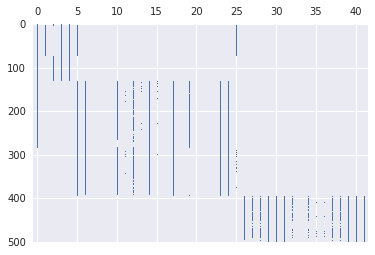

In [15]:
gen_columns = bs_2g_columns+bs_3g_columns+bs_4g_columns
plt.spy(bs_avg_kpi.sample(500)[gen_columns].sort_values(gen_columns), markersize=1, aspect='auto' )

В целом примерно так и есть, но бывают исключения. Похоже, колонки `CELL_AVAILABILITY` ведут себя нетипично. Зато остальные колонки вроде бы удовлетворяют гипотезе. Давайте исключим эти колонки из списка.

In [16]:
bs_2g_columns.remove('CELL_AVAILABILITY_2G')
bs_3g_columns.remove('CELL_AVAILABILITY_3G')
bs_4g_columns.remove('CELL_AVAILABILITY_4G')

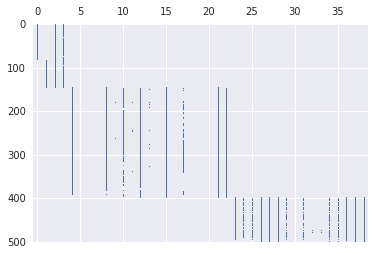

In [17]:
gen_columns = bs_2g_columns+bs_3g_columns+bs_4g_columns
plt.spy(bs_avg_kpi.sample(500)[gen_columns].sort_values(gen_columns), markersize=1, aspect='auto' )

Теперь все хорошо разделяется. Определим для каждой соты ее поколение. Идея простая - поколение соты определяется тем, в какой из групп у нее больше всего непустых измерений.

In [18]:
bs_avg_kpi_counts = bs_avg_kpi.groupby('CELL_LAC_ID')[gen_columns].count()

In [19]:
bs_2g = bs_avg_kpi_counts[bs_2g_columns].max(axis=1)[lambda r: r > 0].index
bs_3g = bs_avg_kpi_counts[bs_3g_columns].max(axis=1)[lambda r: r > 0].index
bs_4g = bs_avg_kpi_counts[bs_4g_columns].max(axis=1)[lambda r: r > 0].index

Теперь в переменных `bs_2g`, `bs_3g` и `bs_4g` лежат списки идентификаторов сот по поколениям. По крайней мере, мы на это надеемся. Проверим себя: эти списки не должны пересекаться и в суммме должны давать полный список сот.

In [20]:
set(bs_2g).intersection(bs_3g)

{100598, 507353}

In [21]:
set(bs_2g).intersection(bs_4g)

{23850, 196323, 228465, 235430, 296060}

In [22]:
set(bs_3g).intersection(bs_4g)

{219396}

Интересно. Есть какие-то пересечения. Видимо, какие-то ошибки, надо посмотреть на данные.

In [23]:
problem_cells = list(set(bs_2g).intersection(bs_3g).union(set(bs_2g).intersection(bs_4g)).union(set(bs_3g).intersection(bs_4g)))

In [24]:
bs_avg_kpi_counts.loc[problem_cells, :].T

CELL_LAC_ID,228465,196323,219396,100598,235430,507353,23850,296060
CSSR_2G,78,151,0,0,66,0,77,133
PSSR_2G,0,0,0,67,0,47,0,0
TBF_DROP_RATE_2G,78,151,0,67,66,47,77,133
TCH_DROP_RATE_2G,73,151,0,67,65,45,73,133
CSSR_3G,0,0,150,85,0,105,0,0
HSPDSCH_CODE_UTIL_3G,0,0,0,0,0,0,0,0
NODEB_CNBAP_LOAD_HARDWARE,0,0,0,0,0,0,0,0
PROC_LOAD_3G,0,0,0,0,0,0,0,0
PSSR_3G,0,0,132,85,0,106,0,0
RAB_CS_BLOCKING_RATE_3G,0,0,0,3,0,0,0,0


Да, непонятно. Но ничего страшного. Всего 8 сот - это допустимая погрешность. Видимо, где-то в данные вкралась ошибка. Можно их либо выкинуть, либо отнести к тому поколению, по которому больше всего измерений.

In [25]:
bs_2g_counts = bs_avg_kpi_counts[bs_2g_columns].max(axis=1)
bs_3g_counts = bs_avg_kpi_counts[bs_3g_columns].max(axis=1)
bs_4g_counts = bs_avg_kpi_counts[bs_4g_columns].max(axis=1)

In [26]:
bs_counts = pd.DataFrame({'2g':bs_2g_counts, '3g':bs_3g_counts, '4g':bs_4g_counts}, index=bs_avg_kpi_counts.index)

In [27]:
bs_counts.loc[problem_cells, :]

,2g,3g,4g
CELL_LAC_ID,,,
228465,78,0,5
196323,151,0,47
219396,0,150,3
100598,67,85,0
235430,66,0,14
507353,47,106,0
23850,77,0,16
296060,133,0,5


Итоговое правило такое: относим соту к тому поколению, по которому у нее больше всего измерений. В большинестве случаев это выбор между нулем и не нулем, неоднозначности - только по 8 сотам.

In [28]:
bs_gen = bs_counts.idxmax(axis=1)

In [29]:
bs_gen.head()

CELL_LAC_ID
1    3g
2    3g
3    4g
4    2g
5    3g
dtype: object

В итоге в `bs_gen` лежит принадлежность каждой соты к одному поколению.

Теперь можно разбить одну таблицу `bs_avg_kpi` на три таблицы - по одной для каждого поколения.

In [30]:
bs_2g = bs_gen[bs_gen=='2g'].index
bs_3g = bs_gen[bs_gen=='3g'].index
bs_4g = bs_gen[bs_gen=='4g'].index

Поскольку раньше мы удалили из списка колонок по поколениям поля `CELL_AVAILABILITY`, теперь надо их вернуть.

In [31]:
bs_2g_columns = ['CELL_AVAILABILITY_2G'] + bs_2g_columns
bs_3g_columns = ['CELL_AVAILABILITY_3G'] + bs_3g_columns
bs_4g_columns = ['CELL_AVAILABILITY_4G'] + bs_4g_columns

In [32]:
bs_avg_kpi_2g = bs_avg_kpi[bs_avg_kpi['CELL_LAC_ID'].isin(set(bs_2g))][['T_DATE', 'CELL_LAC_ID'] + bs_2g_columns]
bs_avg_kpi_3g = bs_avg_kpi[bs_avg_kpi['CELL_LAC_ID'].isin(set(bs_3g))][['T_DATE', 'CELL_LAC_ID'] + bs_3g_columns]
bs_avg_kpi_4g = bs_avg_kpi[bs_avg_kpi['CELL_LAC_ID'].isin(set(bs_4g))][['T_DATE', 'CELL_LAC_ID'] + bs_4g_columns]

In [33]:
bs_avg_kpi_2g.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15925813 entries, 0 to 58941358
Data columns (total 7 columns):
T_DATE                  category
CELL_LAC_ID             int64
CELL_AVAILABILITY_2G    float16
CSSR_2G                 float16
PSSR_2G                 float16
TBF_DROP_RATE_2G        float16
TCH_DROP_RATE_2G        float16
dtypes: category(1), float16(5), int64(1)
memory usage: 425.3 MB


In [34]:
bs_avg_kpi_3g.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29487663 entries, 26 to 58941373
Data columns (total 22 columns):
T_DATE                       category
CELL_LAC_ID                  int64
CELL_AVAILABILITY_3G         float16
CSSR_3G                      float16
HSPDSCH_CODE_UTIL_3G         float16
NODEB_CNBAP_LOAD_HARDWARE    float16
PROC_LOAD_3G                 float16
PSSR_3G                      float16
RAB_CS_BLOCKING_RATE_3G      float16
RAB_CS_DROP_RATE_3G          float16
RAB_PS_BLOCKING_RATE_3G      float16
RAB_PS_DROP_RATE_3G          float16
RRC_BLOCKING_RATE_3G         float16
RTWP_3G                      float16
SHO_FACTOR                   float16
UTIL_BRD_CPU_3G              float16
UTIL_CE_DL_3G                float16
UTIL_CE_HW_DL_3G             float16
UTIL_CE_UL_3G                float16
UTIL_SUBUNITS_3G             float16
TOTAL_DL_VOLUME_3G           float16
TOTAL_UL_VOLUME_3G           float16
dtypes: category(1), float16(20), int64(1)
memory usage: 1.6 GB


In [35]:
bs_avg_kpi_4g.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13527907 entries, 148 to 58941382
Data columns (total 19 columns):
T_DATE                            category
CELL_LAC_ID                       int64
CELL_AVAILABILITY_4G              float16
ERAB_PS_BLOCKING_RATE_LTE         float16
ERAB_PS_BLOCKING_RATE_PLMN_LTE    float16
ERAB_PS_DROP_RATE_LTE             float16
PART_CQI_QPSK_LTE                 float16
PART_MCS_QPSK_LTE                 float16
PSSR_LTE                          float16
RBU_AVAIL_DL                      float16
RBU_AVAIL_DL_LTE                  float16
RBU_AVAIL_UL                      float16
RBU_OTHER_DL                      float16
RBU_OTHER_UL                      float16
RBU_OWN_DL                        float16
RBU_OWN_UL                        float16
RRC_BLOCKING_RATE_LTE             float16
UL_VOLUME_LTE                     float16
DL_VOLUME_LTE                     float16
dtypes: category(1), float16(17), int64(1)
memory usage: 670.9 MB


Теперь можно удалить исходную таблицу `bs_avg_kpi`, она больше не нужна.

In [36]:
del bs_avg_kpi

## Исследование данных сот по поколениям

Построим корреляции между показателями одного поколения.

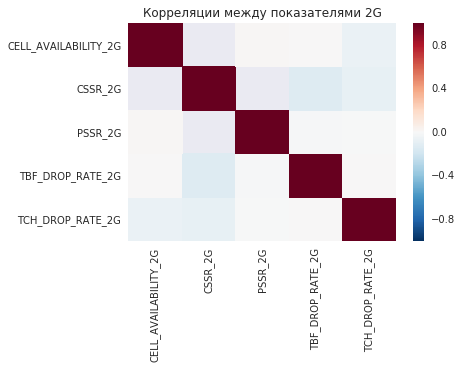

In [37]:
sns.heatmap(bs_avg_kpi_2g[bs_2g_columns].corr());
plt.title('Корреляции между показателями 2G');

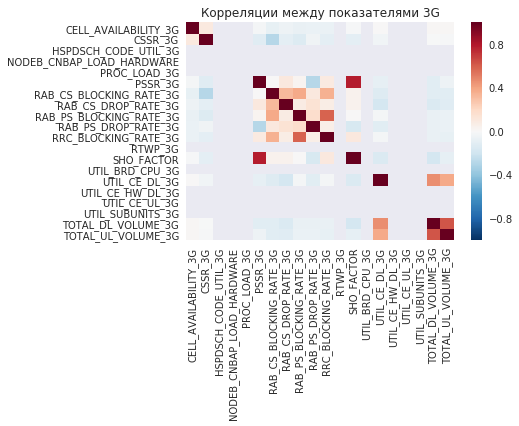

In [38]:
sns.heatmap(bs_avg_kpi_3g[bs_3g_columns].corr());
plt.title('Корреляции между показателями 3G');

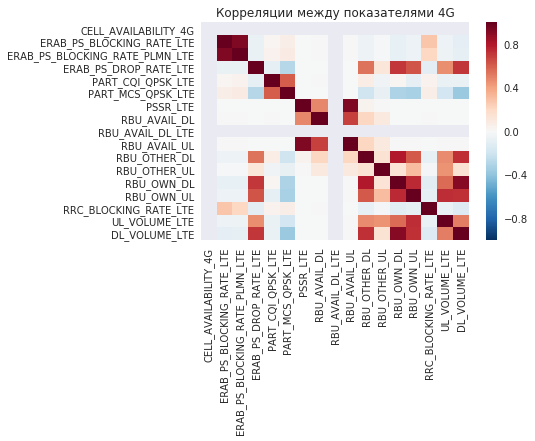

In [39]:
sns.heatmap(bs_avg_kpi_4g[bs_4g_columns].corr());
plt.title('Корреляции между показателями 4G');

Можно посмотреть на пустые значения.

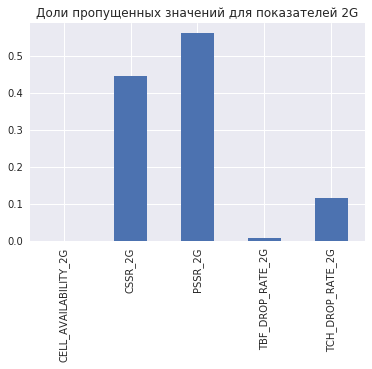

In [40]:
(bs_avg_kpi_2g[bs_2g_columns].isnull().sum()/bs_avg_kpi_2g.shape[0]).plot(kind='bar');
plt.title('Доли пропущенных значений для показателей 2G');

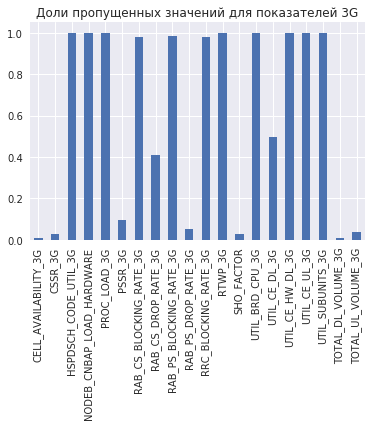

In [41]:
(bs_avg_kpi_3g[bs_3g_columns].isnull().sum()/bs_avg_kpi_3g.shape[0]).plot(kind='bar');
plt.title('Доли пропущенных значений для показателей 3G');

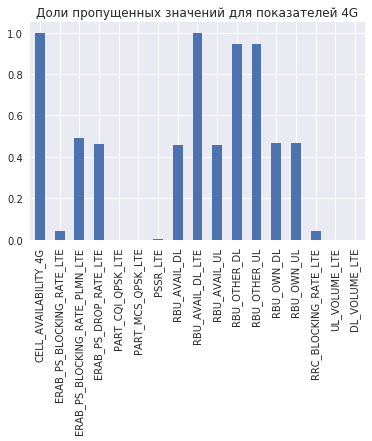

In [42]:
(bs_avg_kpi_4g[bs_4g_columns].isnull().sum()/bs_avg_kpi_4g.shape[0]).plot(kind='bar');
plt.title('Доли пропущенных значений для показателей 4G');

Можно сразу выкинуть показатели со слишком большим количеством пустых значений для 3g и 4g. Конечно, всегда есть возможность, что сам факт наличия непустого значения уже несет какую-то информацию.

In [43]:
(bs_avg_kpi_3g[bs_3g_columns].isnull().sum()/bs_avg_kpi_3g.shape[0]).sort_values(ascending=False)

PROC_LOAD_3G                 1.000000
UTIL_SUBUNITS_3G             1.000000
UTIL_CE_UL_3G                1.000000
UTIL_CE_HW_DL_3G             1.000000
UTIL_BRD_CPU_3G              1.000000
HSPDSCH_CODE_UTIL_3G         1.000000
RTWP_3G                      1.000000
NODEB_CNBAP_LOAD_HARDWARE    1.000000
RAB_PS_BLOCKING_RATE_3G      0.984723
RAB_CS_BLOCKING_RATE_3G      0.979956
RRC_BLOCKING_RATE_3G         0.977783
UTIL_CE_DL_3G                0.494886
RAB_CS_DROP_RATE_3G          0.408621
PSSR_3G                      0.095985
RAB_PS_DROP_RATE_3G          0.051837
TOTAL_UL_VOLUME_3G           0.036858
CSSR_3G                      0.030353
SHO_FACTOR                   0.027276
TOTAL_DL_VOLUME_3G           0.008815
CELL_AVAILABILITY_3G         0.008549
dtype: float64

In [44]:
columns_3g_missing = ['PROC_LOAD_3G','UTIL_SUBUNITS_3G','UTIL_CE_UL_3G','UTIL_CE_HW_DL_3G','UTIL_BRD_CPU_3G',
                      'HSPDSCH_CODE_UTIL_3G','RTWP_3G','NODEB_CNBAP_LOAD_HARDWARE','RAB_PS_BLOCKING_RATE_3G',
                      'RAB_CS_BLOCKING_RATE_3G','RRC_BLOCKING_RATE_3G']

In [45]:
(bs_avg_kpi_4g[bs_4g_columns].isnull().sum()/bs_avg_kpi_4g.shape[0]).sort_values(ascending=False)

RBU_AVAIL_DL_LTE                  1.000000
CELL_AVAILABILITY_4G              1.000000
RBU_OTHER_UL                      0.944913
RBU_OTHER_DL                      0.942915
ERAB_PS_BLOCKING_RATE_PLMN_LTE    0.491592
RBU_OWN_UL                        0.469006
RBU_OWN_DL                        0.468994
ERAB_PS_DROP_RATE_LTE             0.462217
RBU_AVAIL_UL                      0.455615
RBU_AVAIL_DL                      0.455615
ERAB_PS_BLOCKING_RATE_LTE         0.043325
RRC_BLOCKING_RATE_LTE             0.039796
PSSR_LTE                          0.003842
DL_VOLUME_LTE                     0.000442
UL_VOLUME_LTE                     0.000437
PART_MCS_QPSK_LTE                 0.000348
PART_CQI_QPSK_LTE                 0.000299
dtype: float64

In [46]:
columns_4g_missing = ['RBU_AVAIL_DL_LTE','CELL_AVAILABILITY_4G','RBU_OTHER_UL','RBU_OTHER_DL']

Удалим эти колонки.

In [47]:
bs_avg_kpi_3g.drop(labels=columns_3g_missing, axis=1, inplace=True)
bs_avg_kpi_4g.drop(labels=columns_4g_missing, axis=1, inplace=True)

In [48]:
bs_3g_columns = [c for c in bs_3g_columns if c not in columns_3g_missing]
bs_4g_columns = [c for c in bs_4g_columns if c not in columns_4g_missing]

Аналогично можно посмотреть на колонки с маленьким количеством уникальных значений.

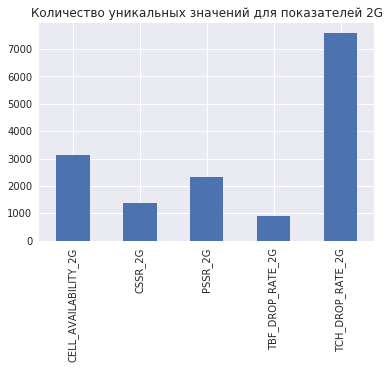

In [49]:
bs_avg_kpi_2g[bs_2g_columns].nunique().plot(kind='bar');
plt.title('Количество уникальных значений для показателей 2G');

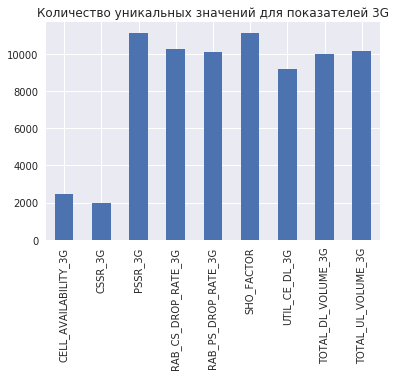

In [50]:
bs_avg_kpi_3g[bs_3g_columns].nunique().plot(kind='bar');
plt.title('Количество уникальных значений для показателей 3G');

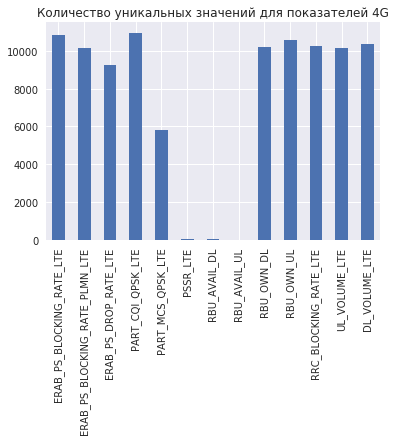

In [51]:
bs_avg_kpi_4g[bs_4g_columns].nunique().plot(kind='bar');
plt.title('Количество уникальных значений для показателей 4G');

Наблюдаем какую-то явную аномалию по показателям 4G. Выкинем эти колонки. Опять же, есть вероятность, что даже с малым количеством переменная несет информацию, так что этот шаг можно и не делать. 

In [52]:
bs_avg_kpi_4g[bs_4g_columns].nunique().sort_values()

RBU_AVAIL_UL                         10
RBU_AVAIL_DL                         11
PSSR_LTE                             13
PART_MCS_QPSK_LTE                  5796
ERAB_PS_DROP_RATE_LTE              9245
UL_VOLUME_LTE                     10154
ERAB_PS_BLOCKING_RATE_PLMN_LTE    10175
RBU_OWN_DL                        10183
RRC_BLOCKING_RATE_LTE             10285
DL_VOLUME_LTE                     10387
RBU_OWN_UL                        10605
ERAB_PS_BLOCKING_RATE_LTE         10864
PART_CQI_QPSK_LTE                 10972
dtype: int64

In [53]:
columns_too_few_4g = ['RBU_AVAIL_UL', 'RBU_AVAIL_DL', 'PSSR_LTE']

In [54]:
bs_avg_kpi_4g.drop(labels=columns_too_few_4g, axis=1, inplace=True)

In [55]:
bs_4g_columns = [c for c in bs_4g_columns if c not in columns_too_few_4g]

Пересчитаем корреляции.

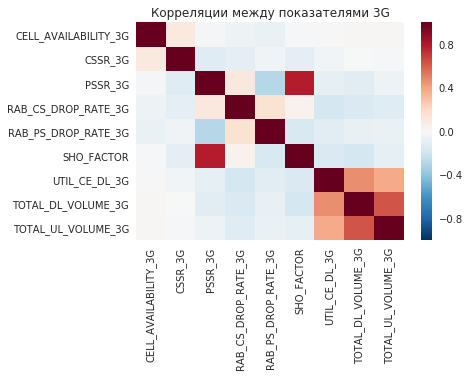

In [56]:
sns.heatmap(bs_avg_kpi_3g[bs_3g_columns].corr());
plt.title('Корреляции между показателями 3G');

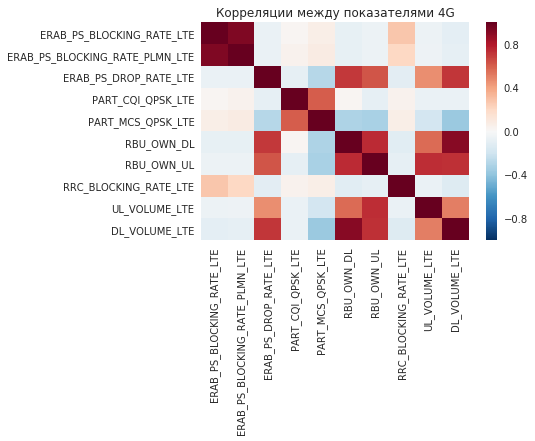

In [57]:
sns.heatmap(bs_avg_kpi_4g[bs_4g_columns].corr());
plt.title('Корреляции между показателями 4G');

Дальше можно двигаться несколькими путями. Можно попробовать заполнить пустые значения. Можно использовать метод главных компонент для сокращения размерности. Можно попробовать найти аномальные соты по одному или по нескольким показателям. Можно провести кластерный анализ и выделить группы похожих сот.

Для заполнения пропущенных значений можно воспользоваться особенностями структуры данных. В таблице лежат исторические данные по каждой соте. Пропущенное значение означает, что по какой-то соте нет измерения в определенный момент времени. Тогда для заполнения этого значния можно воспользоваться ожидаемым показателем измерения именно по этой соте. Возможно, с учетом дня недели (выходной/рабочий). Например, если по какому-то показателю у определенной соты нет измерения за некоторый рабочий день, можно заполнить его средним значением показателя у этой соты в другие рабочие дни.

Пример. Найдем соту 4G с пропущенным значением `DL_VOLUME_LTE`.

In [58]:
bs_avg_kpi_4g[bs_avg_kpi_4g['DL_VOLUME_LTE'].isnull()].head()

,T_DATE,CELL_LAC_ID,ERAB_PS_BLOCKING_RATE_LTE,ERAB_PS_BLOCKING_RATE_PLMN_LTE,ERAB_PS_DROP_RATE_LTE,PART_CQI_QPSK_LTE,PART_MCS_QPSK_LTE,RBU_OWN_DL,RBU_OWN_UL,RRC_BLOCKING_RATE_LTE,UL_VOLUME_LTE,DL_VOLUME_LTE
3877,04.01,256917,1.0,NaN,NaN,0.063049,0.951660,NaN,NaN,0.003311,NaN,NaN
27325,14.05,463816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41176,16.05,371595,NaN,NaN,NaN,0.433105,0.983398,NaN,NaN,NaN,NaN,NaN
57275,03.01,264597,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
58258,30.01,55518,NaN,NaN,NaN,0.344238,0.460449,0.001495,NaN,NaN,NaN,NaN


Построим по ней график зависимости показателя от времени.

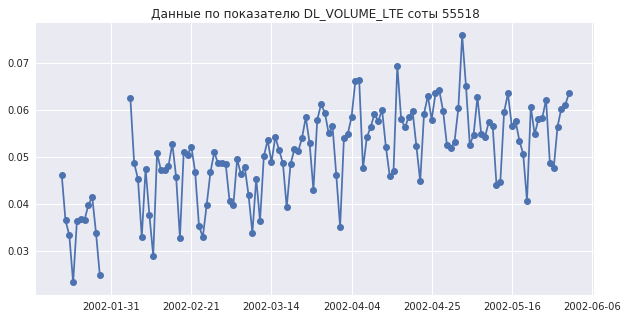

In [59]:
cell_history = bs_avg_kpi_4g.loc[bs_avg_kpi_4g['CELL_LAC_ID']==55518, ['T_DATE', 'DL_VOLUME_LTE']]

cell_history['date'] = pd.to_datetime(cell_history['T_DATE'].astype(str) + '.02', dayfirst=True)

cell_history = cell_history.sort_values('date')

plt.figure(figsize=(10,5));
plt.plot(cell_history['date'], cell_history['DL_VOLUME_LTE'], '-o');
plt.title('Данные по показателю DL_VOLUME_LTE соты 55518');

Глядя на этот график, становится очевидным, что пропущенные значения нужно заполнять с учетом значений из похожих дней для этой соты. Здесь отчетливо виден недельный цикл (а если присмотреться, то видны и праздники марта и мая), так что среднее значение для заполнения нужно брать с учетом этого цикла.

Аналогичные действия можно проделать с данными в таблице `bs_chnn_kpi`, при этом мы уже знаем принадлежность каждой соты к поколениям.

## Определение поколения телефона абонента

Для начала загрузим таблицу `subs_features`.

In [60]:
subs_features_train = pd.read_csv(os.path.join(PATH, 'subs_features_train.csv'), sep=';', decimal=',')
subs_features_test = pd.read_csv(os.path.join(PATH, 'subs_features_test.csv'), sep=';', decimal=',')

In [61]:
subs_features = pd.concat([subs_features_train, subs_features_test])

In [62]:
subs_features.head()

,SNAP_DATE,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
0,01.08.01,4,3339,80,5,2,1,12.0,1,1489.0,...,1,1,0.031696,0.076724,0.040279,0.0133,0.083382,0.027579,0.103896,2.0
1,01.08.01,4,238,75,5,2,1,7.0,1,945.0,...,1,1,0.015893,0.012981,0.000000,0.0000,0.048930,0.027579,0.103896,3.0
2,01.08.01,4,4669,43,5,2,1,3.0,3,1033.0,...,1,1,0.000415,0.000000,0.000000,0.0000,0.009397,0.027579,0.103896,3.0
3,01.08.01,4,2555,54,5,2,1,12.0,1,512.0,...,1,1,0.046510,0.039486,0.000829,0.0000,0.196676,0.027579,0.103896,1.0
4,01.08.01,4,2291,38,5,2,1,7.0,1,1268.0,...,1,1,0.005393,0.007385,0.003884,0.0000,0.047297,0.027579,0.103896,6.0


Возьмем данные за последний месяц.

In [63]:
subs_phone_types = subs_features[subs_features['SNAP_DATE'] == '01.05.02'][['SK_ID', 'INTERNET_TYPE_ID']]

Какие бывают значения поля `INTERNET_TYPE_ID`?

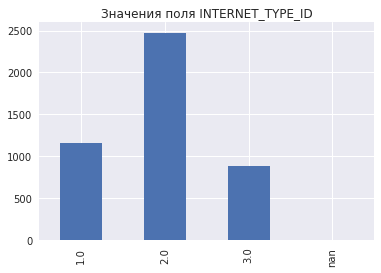

In [64]:
subs_phone_types['INTERNET_TYPE_ID'].value_counts(dropna=False).sort_index().plot(kind='bar');
plt.title('Значения поля INTERNET_TYPE_ID');

Видим три значения. Кроме того, бывают пропущенные значения. Видимо, это случаи, когда не получилось определить поколение телефона. Таких людей мало, так что это не критично. 

Итак, есть три возможноых значения - 1, 2 и 3. Как понять, какой из этих идентификаторов соответствует какому поколению телефона? Воспользуемся простой идеей. Не секрет, что через телефон 2G тяжело скачать большой объем данных. В то же время через телефон 4G большой объем данных прокачать уже можно. Телефоны 3G занимают промежуточное положение. Значит, можно посмотреть на объемы интернет-трафика, прокачиваемые в среднем на каждый тип телефона, и по нему определить поколения.

Объемы скачанного трафика можно посмотреть в таблице `subs_bs_consumption`. Загрузим ее.

In [65]:
subs_bs_consumption_train = pd.read_csv(os.path.join(PATH, 'subs_bs_consumption_train.csv'), sep=';', decimal=',')
subs_bs_consumption_test = pd.read_csv(os.path.join(PATH, 'subs_bs_consumption_test.csv'), sep=';', decimal=',')

In [66]:
subs_bs_consumption = pd.concat([subs_bs_consumption_train, subs_bs_consumption_test])

In [68]:
subs_bs_consumption['MON'].value_counts().sort_index()

01.02    377460
01.03    782819
01.04    700463
01.05    411256
Name: MON, dtype: int64

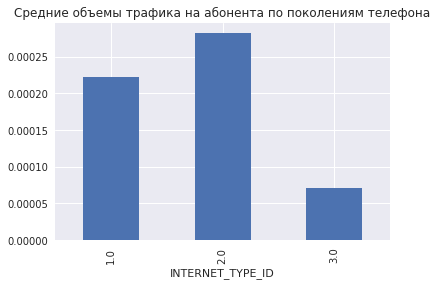

In [69]:
(subs_phone_types
     .merge(subs_bs_consumption[subs_bs_consumption['MON']=='01.05'], on='SK_ID')
     .groupby('INTERNET_TYPE_ID')
     ['SUM_DATA_MB'].mean()
).plot(kind='bar');
plt.title('Средние объемы трафика на абонента по поколениям телефона');

Итак, можно предположить, что идентификатор 2 соответствует поколению телефона 4g, 1 - 3g и 3 - 2g.

Добавим информацию о поколении телефона в исходные данные.

In [70]:
subs_features['PHONE_GEN'] = np.nan
subs_features.loc[subs_features['INTERNET_TYPE_ID'] == 1, 'PHONE_GEN'] = '3G'
subs_features.loc[subs_features['INTERNET_TYPE_ID'] == 2, 'PHONE_GEN'] = '4G'
subs_features.loc[subs_features['INTERNET_TYPE_ID'] == 3, 'PHONE_GEN'] = '2G'

In [71]:
subs_features.head()

,SNAP_DATE,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34,PHONE_GEN
0,01.08.01,4,3339,80,5,2,1,12.0,1,1489.0,...,1,0.031696,0.076724,0.040279,0.0133,0.083382,0.027579,0.103896,2.0,4G
1,01.08.01,4,238,75,5,2,1,7.0,1,945.0,...,1,0.015893,0.012981,0.000000,0.0000,0.048930,0.027579,0.103896,3.0,2G
2,01.08.01,4,4669,43,5,2,1,3.0,3,1033.0,...,1,0.000415,0.000000,0.000000,0.0000,0.009397,0.027579,0.103896,3.0,2G
3,01.08.01,4,2555,54,5,2,1,12.0,1,512.0,...,1,0.046510,0.039486,0.000829,0.0000,0.196676,0.027579,0.103896,1.0,3G
4,01.08.01,4,2291,38,5,2,1,7.0,1,1268.0,...,1,0.005393,0.007385,0.003884,0.0000,0.047297,0.027579,0.103896,6.0,2G


## Определение важных сот для абонента

In [72]:
subs_bs_consumption.head()

,SK_ID,CELL_LAC_ID,MON,SUM_MINUTES,SUM_DATA_MB,SUM_DATA_MIN
0,1827,240277,01.03,0.000000,0.000002,0.000234
1,1827,355195,01.03,0.000072,0.000000,0.000000
2,1827,238554,01.04,0.000000,0.000019,0.000326
3,1827,350978,01.04,0.016576,0.002260,0.004329
4,1827,315010,01.04,0.012755,0.001186,0.002491


Посмотрим, сколько сот бывает у абонентов.

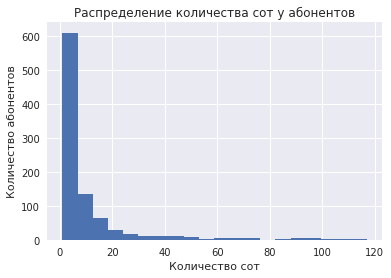

In [74]:
subs_bs_consumption.groupby('SK_ID')['CELL_LAC_ID'].nunique().value_counts().plot(kind='hist', bins=20);
plt.title('Распределение количества сот у абонентов');
plt.xlabel('Количество сот');
plt.ylabel('Количество абонентов');

Видно, что у большинства абонентов сот не так уж много. Посмотрим на нескольких абонентов.

Будем смотреть отдельно по минутам голоса, по трафику и по времени передачи данных.

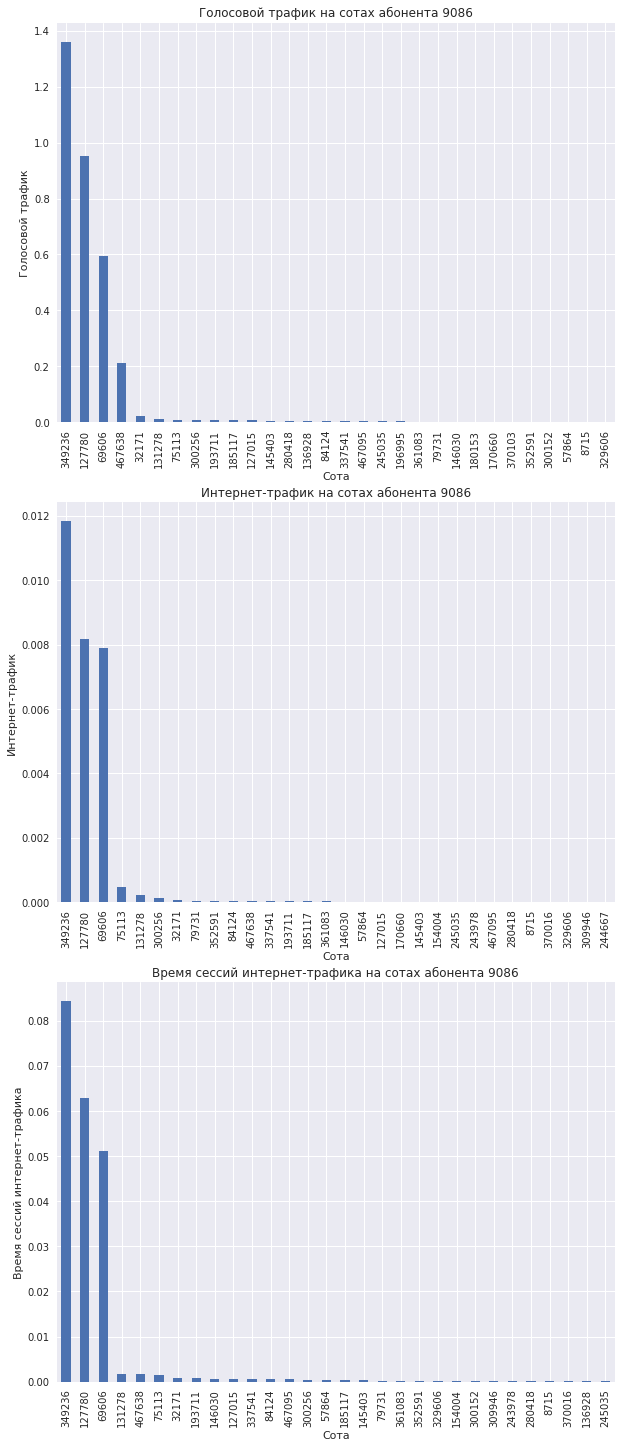

In [75]:
sk_id = 9086
plt.figure(figsize=(10,25))

plt.subplot(311)

(subs_bs_consumption[(subs_bs_consumption['SK_ID']==sk_id)&(subs_bs_consumption['SUM_MINUTES'] > 0)]
     .groupby('CELL_LAC_ID')
     ['SUM_MINUTES']
     .sum()
     .sort_values(ascending=False)
     .head(30)
     .plot(kind='bar')
)
plt.xlabel('Сота')
plt.ylabel('Голосовой трафик')
plt.title(f'Голосовой трафик на сотах абонента {sk_id}');

plt.subplot(312)
(subs_bs_consumption[(subs_bs_consumption['SK_ID']==sk_id)&(subs_bs_consumption['SUM_DATA_MB'] > 0)]
     .groupby('CELL_LAC_ID')
     ['SUM_DATA_MB']
     .sum()
     .sort_values(ascending=False)
     .head(30) 
     .plot(kind='bar')
)
plt.xlabel('Сота')
plt.ylabel('Интернет-трафик')
plt.title(f'Интернет-трафик на сотах абонента {sk_id}');

plt.subplot(313)
(subs_bs_consumption[(subs_bs_consumption['SK_ID']==sk_id)&(subs_bs_consumption['SUM_DATA_MIN'] > 0)]
     .groupby('CELL_LAC_ID')
     ['SUM_DATA_MIN']
     .sum()
     .sort_values(ascending=False)
     .head(30) 
     .plot(kind='bar')
)
plt.xlabel('Сота')
plt.ylabel('Время сессий интернет-трафика')
plt.title(f'Время сессий интернет-трафика на сотах абонента {sk_id}');

По этому абоненту мы видим, что основную голосовую активность абонент совершает на 4 сотах, а интернет-активность - на трех. При этом этот топ сот по интернет-трафику совпадает как по времени, так и по объему трафика. То есть больше всего абонент качает там, где он чаще бывает.

Возьмем теперь другого абонента.

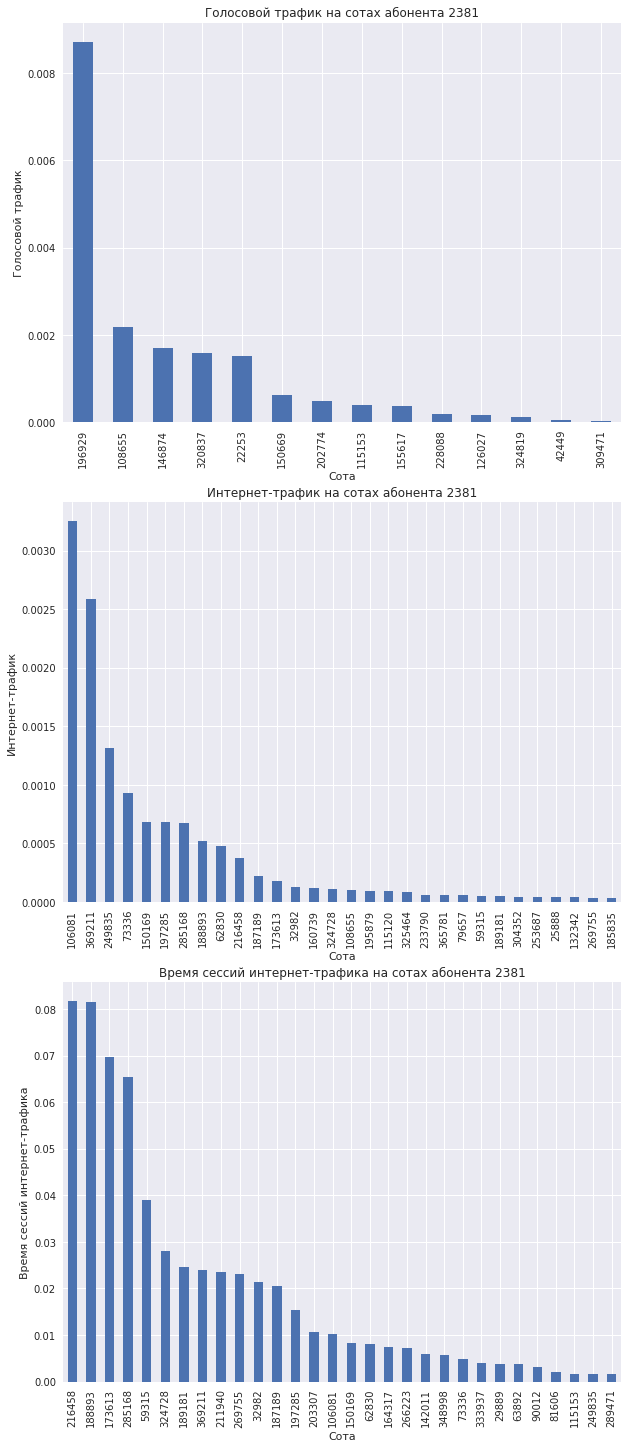

In [76]:
sk_id = 2381
plt.figure(figsize=(10,25))

plt.subplot(311)

(subs_bs_consumption[(subs_bs_consumption['SK_ID']==sk_id)&(subs_bs_consumption['SUM_MINUTES'] > 0)]
     .groupby('CELL_LAC_ID')
     ['SUM_MINUTES']
     .sum()
     .sort_values(ascending=False)
     .head(30)
     .plot(kind='bar')
)
plt.xlabel('Сота')
plt.ylabel('Голосовой трафик')
plt.title(f'Голосовой трафик на сотах абонента {sk_id}');

plt.subplot(312)
(subs_bs_consumption[(subs_bs_consumption['SK_ID']==sk_id)&(subs_bs_consumption['SUM_DATA_MB'] > 0)]
     .groupby('CELL_LAC_ID')
     ['SUM_DATA_MB']
     .sum()
     .sort_values(ascending=False)
     .head(30) 
     .plot(kind='bar')
)
plt.xlabel('Сота')
plt.ylabel('Интернет-трафик')
plt.title(f'Интернет-трафик на сотах абонента {sk_id}');

plt.subplot(313)
(subs_bs_consumption[(subs_bs_consumption['SK_ID']==sk_id)&(subs_bs_consumption['SUM_DATA_MIN'] > 0)]
     .groupby('CELL_LAC_ID')
     ['SUM_DATA_MIN']
     .sum()
     .sort_values(ascending=False)
     .head(30) 
     .plot(kind='bar')
)
plt.xlabel('Сота')
plt.ylabel('Время сессий интернет-трафика')
plt.title(f'Время сессий интернет-трафика на сотах абонента {sk_id}');

По этому абоненту выделяется приоритетная голосовая сота и несколько приоритетных сот по интернет-трафику. Но интересно то, что приоритет сот по трафику и по времени передачи данных не совпадает! То есть больше всего трафика абонент выкачал не там, где он больше всего пробыл, и наоборот - в тех местах, где он бывал долго, он не выкачал много трафика. Почему? Одно из возможных объяснений - недостаточное качество связи в тех местах, где он бывает часто. А это, как мы ожидаем, должно сказаться на его оценке CSI.

Как еще можно оценить важность соты? Кроме общего количества времени или трафика на соте, можно учитывать, насколько часто абонент бывает на соте - каждый день, большую часть месяца или всего один или два раза? Эту информацю можно получить из таблиц `subs_bs_data_session` и `subs_bs_voice_session`.

## Попадание в неоптимальный слой

Если у какого-то клиента есть телефон с поддержкой 4G, но по истории мы видим, что он часто качает трафик через соты 3G или даже 2G, как этот факт может влиять на его восприятие качества связи?

Загрузим данные по интернет-сессиям.

In [77]:
subs_bs_data_session_train = pd.read_csv(os.path.join(PATH, 'subs_bs_data_session_train.csv'), sep=';', decimal=',')
subs_bs_data_session_test = pd.read_csv(os.path.join(PATH, 'subs_bs_data_session_test.csv'), sep=';', decimal=',')

In [78]:
subs_bs_data_session = pd.concat([subs_bs_data_session_train, subs_bs_data_session_test])

In [79]:
subs_bs_data_session.head()

,SK_ID,CELL_LAC_ID,DATA_VOL_MB,START_TIME
0,3853,61951,3.561184e-06,04.04 05:00:00
1,3853,61951,2.732445e-07,04.04 06:00:00
2,3853,61951,6.467041e-07,04.04 07:00:00
3,3853,61951,7.513883e-06,04.04 08:00:00
4,3853,61951,9.002802e-05,04.04 17:00:00


Выделим дату.

In [80]:
subs_bs_data_session['START_DATE'] = subs_bs_data_session['START_TIME'].str[:5]

In [81]:
subs_bs_data_session.head()

,SK_ID,CELL_LAC_ID,DATA_VOL_MB,START_TIME,START_DATE
0,3853,61951,3.561184e-06,04.04 05:00:00,04.04
1,3853,61951,2.732445e-07,04.04 06:00:00,04.04
2,3853,61951,6.467041e-07,04.04 07:00:00,04.04
3,3853,61951,7.513883e-06,04.04 08:00:00,04.04
4,3853,61951,9.002802e-05,04.04 17:00:00,04.04


Добавим данные по поколениям сот.

In [82]:
subs_bs_data_session = subs_bs_data_session.merge(bs_gen.to_frame(name='GEN'), 
                                                  left_on='CELL_LAC_ID', 
                                                  right_index=True, 
                                                  how='left')

In [83]:
subs_bs_data_session.head()

,SK_ID,CELL_LAC_ID,DATA_VOL_MB,START_TIME,START_DATE,GEN
0,3853,61951,3.561184e-06,04.04 05:00:00,04.04,4g
1,3853,61951,2.732445e-07,04.04 06:00:00,04.04,4g
2,3853,61951,6.467041e-07,04.04 07:00:00,04.04,4g
3,3853,61951,7.513883e-06,04.04 08:00:00,04.04,4g
4,3853,61951,9.002802e-05,04.04 17:00:00,04.04,4g


Посчитаем для каждого абонента объем трафика по поколениям сот, а также количество сессий и количество различных дней.

In [84]:
subs_gen_traffic = (subs_bs_data_session
                         .groupby(['SK_ID', 'GEN'])
                         ['DATA_VOL_MB', 'START_TIME', 'START_DATE']
                         .agg({'DATA_VOL_MB':'sum',
                               'START_TIME':'nunique',
                               'START_DATE':'nunique'})
                         .reset_index()
                         .pivot_table(index='SK_ID', 
                                      columns='GEN', 
                                      values=['DATA_VOL_MB', 'START_TIME', 'START_DATE'], 
                                      fill_value=0)
                    )

In [85]:
subs_gen_traffic.columns=['DATA_VOL_2G', 'DATA_VOL_3G', 'DATA_VOL_4G',
                          'CNT_DAYS_2G', 'CNT_DAYS_3G', 'CNT_DAYS_4G',
                          'CNT_HOURS_2G', 'CNT_HOURS_3G', 'CNT_HOURS_4G'
                         ]

In [86]:
subs_gen_traffic.head()

,DATA_VOL_2G,DATA_VOL_3G,DATA_VOL_4G,CNT_DAYS_2G,CNT_DAYS_3G,CNT_DAYS_4G,CNT_HOURS_2G,CNT_HOURS_3G,CNT_HOURS_4G
SK_ID,,,,,,,,,
1,0.000078,0.263428,1.786628,2,31,52,3,114,459
2,0.001003,0.001133,0.065091,14,28,61,28,39,572
3,0.057598,0.001426,0.000974,49,7,8,784,32,70
5,0.180218,2.863250,0.098606,61,62,11,423,1119,75
7,0.011367,0.640451,0.204067,47,62,13,120,1248,199


У нас уже известны поколения телефонов для каждого абонента. Для простоты возьмем поколение последнего известного телефона абонента. Заодно посчитаем среднюю выручку абонента.

In [87]:
subs_features_agg = (subs_features
                         .groupby('SK_ID')
                         ['REVENUE', 'PHONE_GEN']
                         .agg({'REVENUE':[np.size, np.mean], 'PHONE_GEN':'last'})
                         .reset_index())

In [88]:
subs_features_agg.columns = ['SK_ID', 'CNT_MONTHS', 'AVG_REVENUE', 'PHONE_GEN']

In [89]:
subs_features_agg.head()

,SK_ID,CNT_MONTHS,AVG_REVENUE,PHONE_GEN
0,1,12.0,0.144715,4G
1,2,5.0,0.128128,4G
2,3,9.0,0.133601,4G
3,4,12.0,0.118478,2G
4,5,12.0,0.129951,4G


Загрузим данные по ответам (для трейна и для теста).

In [90]:
subs_csi_train = pd.read_csv(os.path.join(PATH, 'subs_csi_train.csv'), sep=';', decimal=',')

Соединим таблицы.

In [91]:
data_subs = (subs_csi_train
                .merge(subs_features_agg, on='SK_ID')
                .merge(subs_gen_traffic, left_on='SK_ID', right_index=True))

In [92]:
data_subs.head()

,SK_ID,CSI,CONTACT_DATE,CNT_MONTHS,AVG_REVENUE,PHONE_GEN,DATA_VOL_2G,DATA_VOL_3G,DATA_VOL_4G,CNT_DAYS_2G,CNT_DAYS_3G,CNT_DAYS_4G,CNT_HOURS_2G,CNT_HOURS_3G,CNT_HOURS_4G
0,2,0,04.05,5.0,0.128128,4G,0.001003,0.001133,0.065091,14,28,61,28,39,572
1,3,0,21.05,9.0,0.133601,4G,0.057598,0.001426,0.000974,49,7,8,784,32,70
3,5,0,08.05,12.0,0.129951,4G,0.180218,2.863250,0.098606,61,62,11,423,1119,75
5,7,0,03.05,12.0,0.134504,4G,0.011367,0.640451,0.204067,47,62,13,120,1248,199
7,9,0,29.05,12.0,0.110662,4G,0.000013,0.000024,0.000000,1,3,0,1,3,0


Возьмем абонентов с телефонами 4G.

In [93]:
subs_4g = data_subs[data_subs['PHONE_GEN'] == '4G']

Посмотрим, как часто попадают в сеть 2G довольные и недовольные абоненты.

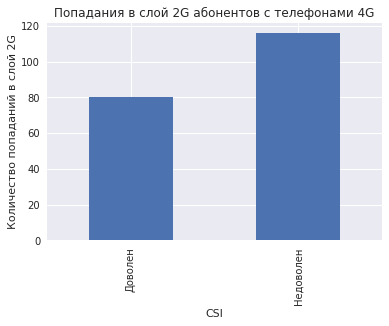

In [94]:
subs_4g.groupby('CSI')['CNT_HOURS_2G'].mean().plot(kind='bar');
plt.ylabel('Количество попаданий в слой 2G');
plt.title('Попадания в слой 2G абонентов с телефонами 4G');
plt.xticks([0,1], ['Доволен', 'Недоволен']);

По графику видно, что у недовольных абоненты в среднем количество попаданий в слой 2G выше, чем у довольных. То есть этот признак можно считать неплохой фичей для предсказания удовлетворенности абонентов.

Надо сделать замечание, что здесь мы смотрели только абонентов, пользующихся передачей данных. Если абонент пользуется только голосом, для него по большому счету не должно быть разницы, в каком поколении сети он находится. Возможно, по таким абонентам стоит сделать отдельную модель.